### Lithium Macro Stats

In [1]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from dataloader import DataLoader
loader = DataLoader(hs_code=282520)

In [16]:
polar_df = loader.get_data()
df = polar_df.to_pandas()

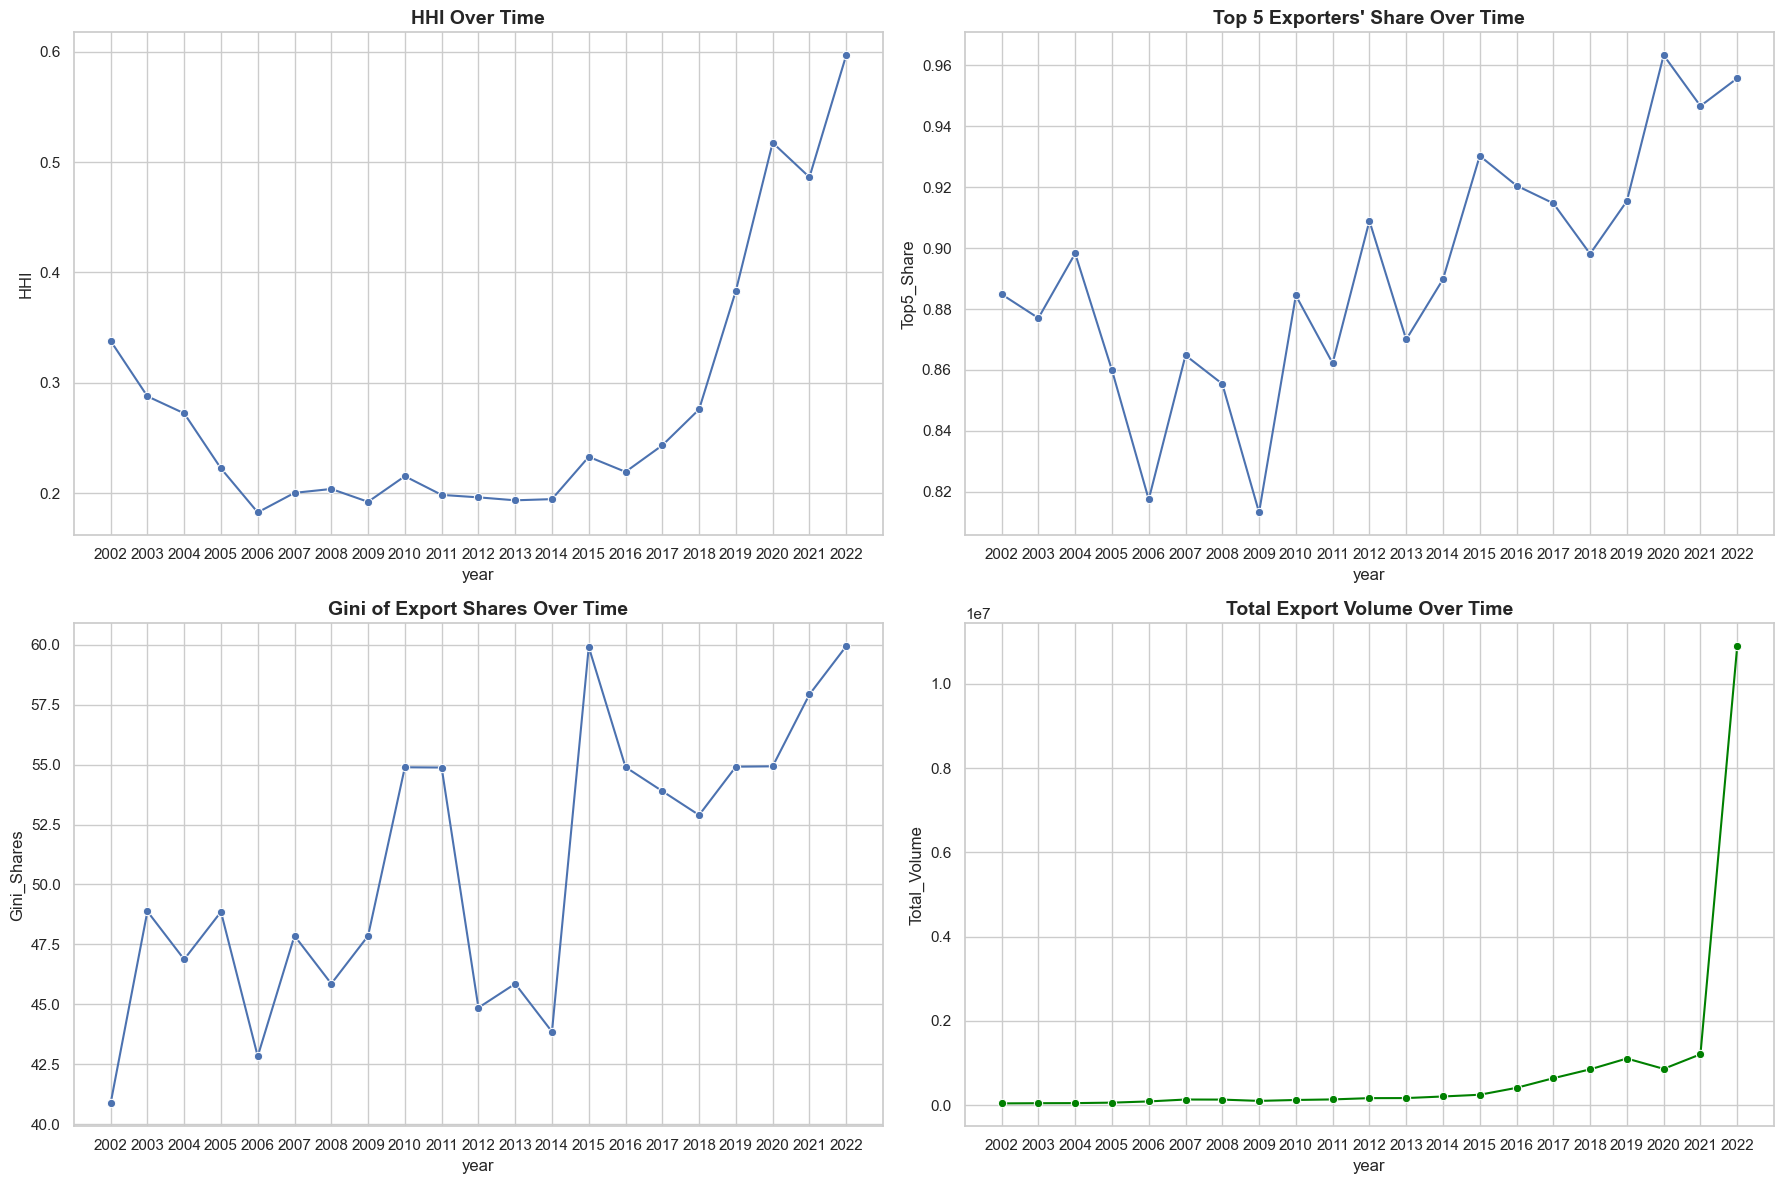

In [11]:
yearly_exports = (
    df.groupby(["t", "export_country"], as_index=False)["v"].sum()
)

years_list = []
hhi_list = []
top5_share_list = []
gini_list = []
shannon_list = []
total_volume_list = []

def gini_coefficient(arr):
    arr = np.array(arr)
    arr = arr[arr > 0]
    arr = np.sort(arr)
    n = len(arr)
    if n == 0:
        return np.nan

    cumulative = np.cumsum(arr)
    sum_arr = cumulative[-1]
    if sum_arr == 0:
        return 0.0

    rel_cumulative = cumulative / sum_arr
    return (n+1 - 2*np.sum(rel_cumulative)/n)

for year, grp in yearly_exports.groupby("t"):
    total_exports = grp["v"].sum()
    shares = grp["v"] / total_exports

    # HHI (Herfindhal Hirschman Index)
    hhi = (shares ** 2).sum()

    # Top 5 Exporter Share
    sorted_shares = np.sort(shares)[::-1]
    top5 = sorted_shares[:5].sum() if len(sorted_shares)>=5 else sorted_shares.sum()

    # Gini Coefficient of Exporter Share
    gini_val = gini_coefficient(shares.values)

    years_list.append(year)
    hhi_list.append(hhi)
    top5_share_list.append(top5)
    gini_list.append(gini_val)
    total_volume_list.append(total_exports)

metrics_df = pd.DataFrame({
    "year": years_list,
    "HHI": hhi_list,
    "Top5_Share": top5_share_list,
    "Gini_Shares": gini_list,
    "Total_Volume": total_volume_list
})

sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = axs.flatten()

sns.lineplot(data=metrics_df, x="year", y="HHI", marker="o", ax=axs[0])
axs[0].set_title("HHI Over Time", fontsize=14, fontweight='bold')
axs[0].set_xticks(metrics_df["year"].unique().astype(int))

sns.lineplot(data=metrics_df, x="year", y="Top5_Share", marker="o", ax=axs[1])
axs[1].set_title("Top 5 Exporters' Share Over Time", fontsize=14, fontweight='bold')
axs[1].set_xticks(metrics_df["year"].unique().astype(int))

sns.lineplot(data=metrics_df, x="year", y="Gini_Shares", marker="o", ax=axs[2])
axs[2].set_title("Gini of Export Shares Over Time", fontsize=14, fontweight='bold')
axs[2].set_xticks(metrics_df["year"].unique().astype(int))

sns.lineplot(data=metrics_df, x="year", y="Total_Volume", marker="o", ax=axs[3], color='green')
axs[3].set_title("Total Export Volume Over Time", fontsize=14, fontweight='bold')
axs[3].set_xticks(metrics_df["year"].unique().astype(int))

plt.tight_layout()
plt.show()

In [12]:
##############################################
#
# INTERPRETATION:
#
##############################################

# HHI
##############################################
# If the HHI is close to 1, it means one exporter dominates nearly all trade.
# HHI increased sharply from 2017 onwards leading to a more concentrated network
##############################################


# Top5 Exporter Shares
##############################################


# Gini of Export Shares
##############################################


# Total Export Volume
##############################################


